In [9]:
import random
import numpy as np
from sklearn.metrics.pairwise import manhattan_distances
from sklearn.metrics.pairwise import euclidean_distances

In [90]:
class KMedoid():
    def __init__(self,*,n_clusters, metric="Euclidean"):
        self.n_clusters = n_clusters
        self.metric = metric
    
    def calculate_cost(self,medoids_idx,X):
        if self.metric=="Euclidean":
            distance_to_medoids = euclidean_distances(X,X[medoids_idx])
        else:
            distance_to_medoids = manhattan_distances(X,X[medoids_idx])
#         print("dtm",distance_to_medoids)
        min_distance = np.amin(distance_to_medoids, axis=1)
        cost = min_distance.sum()
        return cost
    
    def predict(self,X):
        if self.medoids_idx is None:
            raise ValueError("Fit data first!")
        else:
            if self.metric=="Euclidean":
                distance_to_medoids = euclidean_distances(X,X[self.medoids_idx])
            else:
                distance_to_medoids = manhattan_distances(X,X[self.medoids_idx])
            label = np.argmin(distance_to_medoids, axis=1)
        return label 
    
    def fit(self,X):
        if X.shape[0]<self.n_clusters:
            raise ValueError('data size must larger than n_clusters')
        #select initial centroid
        medoids_idx = random.sample(range(0, X.shape[0]), self.n_clusters)
        min_cost = self.calculate_cost(medoids_idx,X)
        stop=False
        #NAIF
        while not stop:
            current_min_cost = np.inf
            for m in range(self.n_clusters):
                for o in range(X.shape[0]):
                    if o not in medoids_idx:
                        #swap medoid m with o random
                        new_medoids_idx = medoids_idx.copy()
                        new_medoids_idx[m] = o
                        new_cost = self.calculate_cost(new_medoids_idx,X)
                        if new_cost<current_min_cost:
                            current_min_cost=new_cost
                            best_m=m
                            best_o=o
            if current_min_cost<min_cost:
                #swap
                medoids_idx[best_m] = best_o
                min_cost = current_min_cost
            else:
                #there is no better medoids config
                stop = True
        self.medoids_idx = medoids_idx

 

In [81]:
x = np.array([[0,0],[1,0],[2,0],[8,0],[9,0],[10,0]])
kmd = KMedoid(n_clusters=2)
kmd.fit(x)
print(kmd)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


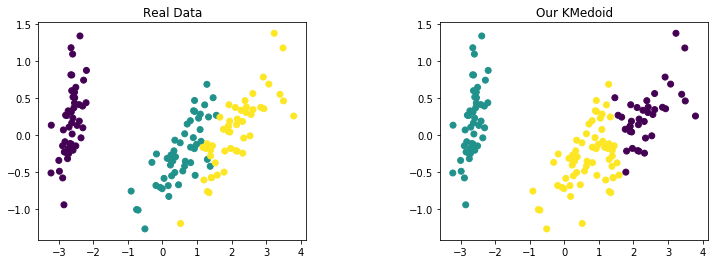

In [96]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

iris_dataset = datasets.load_iris()
iris_data = iris_dataset.data
iris_target = iris_dataset.target
print(iris_target)

kmd = KMedoid(n_clusters=3)
kmd.fit(iris_data)
print(kmd)
label = kmd.predict(iris_data)
print(label)

pca = PCA(n_components=2)
pca.fit(iris_data)
iris_pca = pca.transform(iris_data)

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,4))
fig.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=iris_target)
plt.title("Real Data")
plt.subplot(1, 2, 2)
plt.scatter(iris_pca[:,0],iris_pca[:,1],c=label)
plt.title("Our KMedoid")
plt.show()